# PCR GLOB Aral Sea full basin

Test Run New Server

TODO: 
- Tymen and Chatly might be wrong coordinates, show near zero flow in model output. Might be true for Chatly due to irrigation etc, but not Tyumen
    - should work temporarily now
- Irrigation still not working? Check clonemaps for irrigation pixels to check there? glaciers are not really irrigated anyway
    - new check in actual valley
- check if other variables do work?


In [1]:
# This cell is only used to suppress some distracting output messages
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
import matplotlib.pyplot as plt
from cartopy import crs
from cartopy import feature as cfeature
from rich import print
import pandas as pd
import xarray as xr
from pathlib import Path
from datetime import datetime
from ipywidgets import IntProgress
from IPython.display import display
import fiona
import shapely.geometry
from pyproj import Geod

import ewatercycle.forcing
import ewatercycle.models
import ewatercycle.parameter_sets

Tymen and Chatly might be wrong coordinates, show no flow in model output

In [3]:
# Chatly_station_latitude = 42.34332908492399  # Amu Darya near Chatly
# Chatly_station_longitude = 59.627516175820965 

Chatly_station_latitude = 42.34332908492399-0.5 # Amu Darya near Chatly
Chatly_station_longitude = 59.627516175820965+0.9    # Through trial and error, to get modelled discharge closer to observed

Kerki_station_latitude = 37.8396310038444 #Amu Darya near Kerki
Kerki_station_longitude = 65.23703868931334

#Tyumen_station_latitude = 44.01445789449254 # Syr Darya near Tyumen, google maps
#Tyumen_station_longitude = 67.02866313732494

#Tyumen_station_latitude = 44.05 # Syr Darya near Tyumen, GRDC coords
#Tyumen_station_longitude = 67.05

Tyumen_station_latitude = 44.05-0.1 # Syr Darya near Tyumen, through trial and error
Tyumen_station_longitude = 67.05

Kazalinsk_station_latitude = 45.739988222442456, #Syr Darya near Kazalinsk
Kazalinsk_station_longitude = 62.115993992559744

- Clonemap in parameter-sets folder on shared data drive, quasi hardcoded. Clonemap needs to be in this folder (for now?) relative to all other maps etc
- the .ini file als gets created on model start, but it copies the values from "config = <name>.ini", except for the name of the clonemap needed. That is the only thing needed to be changed

In [4]:


pcr_glob_directory = Path("/data/shared/parameter-sets/pcrglobwb_global")  #GlobalOption uit .ini


prepared_PCRGlob_forcing = Path.cwd()/"forcing_1010" / "AralSeaBasin" / "pcrglobwb" / "work/diagnostic/script" ##MeteoOptions uit .ini

In [5]:


parameter_set = ewatercycle.parameter_sets.ParameterSet(
    name="custom_parameter_set",
    directory=pcr_glob_directory,
    config= Path.cwd() / "pcrglobwb_aral_basin_ERA5_05min.ini",
    target_model="pcrglobwb",
    supported_model_versions={"setters"},
)



In [6]:
# set start and end date of the experiment, overwrites .ini settings
#experiment_start_date = "1987-01-01T00:00:00Z"
#experiment_end_date = "1992-12-31T00:00:00Z" #was 1995-12-31T00:00:00Z, shorter for testing
#experiment_end_date = "1990-02-28T00:00:00Z" #2 months, for testing
#experiment_end_date = "1987-07-31T00:00:00Z" #2 months, for testing

experiment_start_date="2010-06-01T00:00:00Z"
experiment_end_date="2010-06-30T00:00:00Z"

In [7]:
print(parameter_set)

ParameterSet(
    name='custom_parameter_set',
    directory=PosixPath('/data/shared/parameter-sets/pcrglobwb_global'),
    config=PosixPath('/home/avandervee3/MSc_AralSea/book/thesis_projects/MSc/2025_Q1_AndreVanDerVeen_CEG/work_in_pr
ogress/Test_Aral/pcrglobwb_aral_basin_ERA5_05min.ini'),
    doi='N/A',
    target_model='pcrglobwb',
    supported_model_versions={'setters'},
    downloader=None
)

In [8]:
forcing = ewatercycle.forcing.sources["PCRGlobWBForcing"].load(
    directory=prepared_PCRGlob_forcing,
)




print(forcing)

PCRGlobWBForcing(
    start_time='2010-09-01T00:00:00Z',
    end_time='2010-12-31T00:00:00Z',
    directory=PosixPath('/home/avandervee3/MSc_AralSea/book/thesis_projects/MSc/2025_Q1_AndreVanDerVeen_CEG/work_in
_progress/Test_Aral/forcing_1010/AralSeaBasin/pcrglobwb/work/diagnostic/script'),
    shape=PosixPath('/home/avandervee3/MSc_AralSea/book/thesis_projects/MSc/2025_Q1_AndreVanDerVeen_CEG/work_in_pro
gress/Test_Aral/forcing_1010/AralSeaBasin/pcrglobwb/work/diagnostic/script/AralSeaBasin.shp'),
    filenames={},
    precipitationNC='pcrglobwb_OBS6_ERA5_reanaly_1_day_pr_2010-2010_AralSeaBasin.nc',
    temperatureNC='pcrglobwb_OBS6_ERA5_reanaly_1_day_tas_2010-2010_AralSeaBasin.nc'
)

In [9]:
reference = ewatercycle.models.PCRGlobWB(
    parameter_set=parameter_set,
    forcing=forcing
)

print(reference)

PCRGlobWB(
    parameter_set=ParameterSet(
        name='custom_parameter_set',
        directory=PosixPath('/data/shared/parameter-sets/pcrglobwb_global'),
        config=PosixPath('/home/avandervee3/MSc_AralSea/book/thesis_projects/MSc/2025_Q1_AndreVanDerVeen_CEG/work_i
n_progress/Test_Aral/pcrglobwb_aral_basin_ERA5_05min.ini'),
        doi='N/A',
        target_model='pcrglobwb',
        supported_model_versions={'setters'},
        downloader=None
    ),
    forcing=PCRGlobWBForcing(
        start_time='2010-09-01T00:00:00Z',
        end_time='2010-12-31T00:00:00Z',
        directory=PosixPath('/home/avandervee3/MSc_AralSea/book/thesis_projects/MSc/2025_Q1_AndreVanDerVeen_CEG/wor
k_in_progress/Test_Aral/forcing_1010/AralSeaBasin/pcrglobwb/work/diagnostic/script'),
        shape=PosixPath('/home/avandervee3/MSc_AralSea/book/thesis_projects/MSc/2025_Q1_AndreVanDerVeen_CEG/work_in
_progress/Test_Aral/forcing_1010/AralSeaBasin/pcrglobwb/work/diagnostic/script/AralSeaBasin.shp'),
        filenames={},
        precipitationNC='pcrglobwb_OBS6_ERA5_reanaly_1_day_pr_2010-2010_AralSeaBasin.nc',
        temperatureNC='pcrglobwb_OBS6_ERA5_reanaly_1_day_tas_2010-2010_AralSeaBasin.nc'
    )
)

In [10]:
print(reference.parameters)

dict_items([('start_time', '2010-09-01T00:00:00Z'), ('end_time', '2010-09-01T00:00:00Z'), ('routing_method', 
'accuTravelTime'), ('max_spinups_in_years', '0')])

In [11]:

Path.cwd()

PosixPath('/home/avandervee3/MSc_AralSea/book/thesis_projects/MSc/2025_Q1_AndreVanDerVeen_CEG/work_in_progress/Test_Aral')

In [12]:
## hier wordt de nieuwe map gemaakt, verschijnt nu in dezelfde map als notebook
## bevat hier alleen nog .ini file

reference_config, reference_dir = reference.setup(
    start_time = experiment_start_date,
    end_time = experiment_end_date,
    max_spinups_in_years=0
)
reference_config, reference_dir



('/home/avandervee3/MSc_AralSea/book/thesis_projects/MSc/2025_Q1_AndreVanDerVeen_CEG/work_in_progress/Test_Aral/pcrglobwb_20250930_150813/pcrglobwb_ewatercycle.ini',
 '/home/avandervee3/MSc_AralSea/book/thesis_projects/MSc/2025_Q1_AndreVanDerVeen_CEG/work_in_progress/Test_Aral/pcrglobwb_20250930_150813')

In [13]:
print(reference.parameters)

refence_para = reference.parameters

# Convert ISO 8601 strings to datetime objects
start_time = datetime.strptime(experiment_start_date, '%Y-%m-%dT%H:%M:%SZ')
end_time = datetime.strptime(experiment_end_date, '%Y-%m-%dT%H:%M:%SZ')

# Calculate the number of days for the progression bar
delta = end_time - start_time
number_of_days = delta.days
print(f"Number of days to model: {number_of_days}")

dict_items([('start_time', '2010-06-01T00:00:00Z'), ('end_time', '2010-06-30T00:00:00Z'), ('routing_method', 
'accuTravelTime'), ('max_spinups_in_years', '0')])

Number of days to model: 29

In [14]:
#pcrglob.initialize(cfg_file)
reference.initialize(reference_config)

In [15]:
time = pd.date_range(reference.start_time_as_isostr, reference.end_time_as_isostr)
# timeseries = pd.DataFrame(
#     index=pd.Index(time, name="time"), columns=["reference", "experiment1", "experiment2"]
# )
# timeseries.head()

In [16]:
Stations_timeseries = pd.DataFrame(
    index=pd.Index(time, name="time"), columns=["Chatly", "Kerki", "Tyumen", "Kazalinsk"]
)
Stations_timeseries.head()

Stations_timeseries_experiment = Stations_timeseries.copy();
Stations_timeseries_coordinate = Stations_timeseries.copy();

In [17]:
# Progress bar, since this can take a while
f = IntProgress(min=0, max=number_of_days) # instantiate the bar
display(f) # display the bar

while reference.time < reference.end_time:

    reference.update()

    # Track discharge at station location
    discharge_at_Chatly = reference.get_value_at_coords(
        "discharge", lat=[Chatly_station_latitude], lon=[Chatly_station_longitude]
    )
    time = reference.time_as_isostr
    Stations_timeseries.loc[time, "Chatly"] = discharge_at_Chatly[0]

     # Track discharge at station location Kerki
    discharge_at_Kerki = reference.get_value_at_coords(
        "discharge", lat=[Kerki_station_latitude], lon=[Kerki_station_longitude]
    )
    time = reference.time_as_isostr
    Stations_timeseries.loc[time, "Kerki"] = discharge_at_Kerki[0]

    # Track discharge at station Tyumen
    discharge_at_Tyumen = reference.get_value_at_coords(
        "discharge", lat=[Tyumen_station_latitude], lon=[Tyumen_station_longitude]
    )
    time = reference.time_as_isostr
    Stations_timeseries.loc[time, "Tyumen"] = discharge_at_Tyumen[0]

    # Track discharge at station location Karalinsk
    discharge_at_Kazalinsk = reference.get_value_at_coords(
        "discharge", lat=[Kazalinsk_station_latitude], lon=[Kazalinsk_station_longitude]
    )
    time = reference.time_as_isostr
    Stations_timeseries.loc[time, "Kazalinsk"] = discharge_at_Kazalinsk[0]


    f.value += 1

print("Model run finished!")

IntProgress(value=0, max=29)

Model run finished!

In [18]:
Stations_timeseries.head()

,Chatly,Kerki,Tyumen,Kazalinsk
time,,,,
2010-06-01 00:00:00+00:00,950.081299,644.98584,507.677124,658.603699
2010-06-02 00:00:00+00:00,544.992676,1096.105713,520.492798,644.220459
2010-06-03 00:00:00+00:00,448.869873,875.100464,544.146118,676.024048
2010-06-04 00:00:00+00:00,261.211426,1010.329102,722.672607,630.562256
2010-06-05 00:00:00+00:00,231.753754,1687.374268,434.210663,554.064148


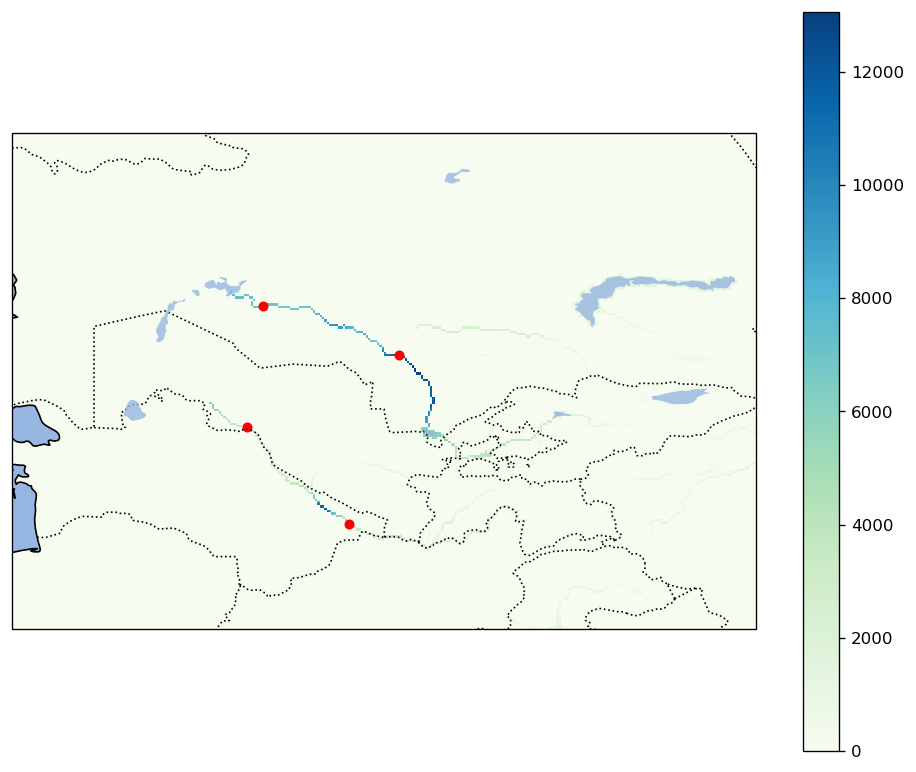

In [19]:
# Use matplotlib to make the figure slightly nicer
fig = plt.figure(figsize=(10,8),dpi=120)
#plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection=crs.PlateCarree())

# Plotting the model field is a one-liner
reference.get_value_as_xarray("discharge").plot(ax=ax, cmap="GnBu")

# Also plot the station location
ax.scatter(Chatly_station_longitude+1, Chatly_station_latitude-0.5, s=25, c="r", label = "Chatly")
ax.scatter(Kerki_station_longitude, Kerki_station_latitude, s=25, c="r", label = "Kerki")
ax.scatter(Tyumen_station_longitude, Tyumen_station_latitude, s=25, c="r", label = "Tyumen")
ax.scatter(Kazalinsk_station_longitude, Kazalinsk_station_latitude, s=25, c="r", label= "Kazalinsk")

# Overlay ocean and coastines
ax.add_feature(cfeature.OCEAN, zorder=2)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.8)
#ax.add_feature(cfeature.RIVERS)
#ax.add_feature(cfeature.RIVERS, zorder=2, color="k")
ax.coastlines(zorder=3)

<Axes: xlabel='time'>

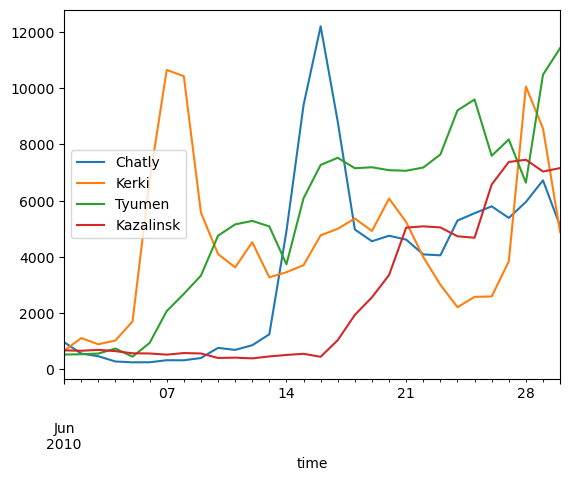

In [20]:
Stations_timeseries.plot(label = Stations_timeseries.columns)

In [21]:

#Stations_timeseries.to_csv('Discharge_testseries.csv', index=True)

## Channel Storage

- test modifying some else than groundwater

In [22]:
#random points between 2 grdc stations
extraction_amu_lon = 64.47358098132075
extraction_amu_lat = 38.27886233967275
extraction_syr_lon = 66.50162231337735
extraction_syr_lat = 44.10221360453554


In [23]:
reference_storage = reference.get_value_as_xarray("channel_storage").copy()
custom_storage = reference_storage*0.9


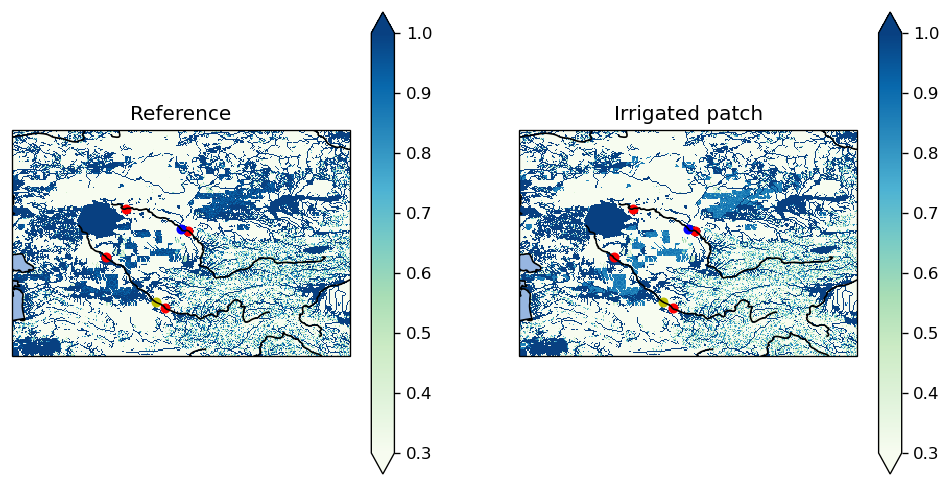

In [24]:
fig = plt.figure(figsize=(10, 5), dpi=120)
left_axes = fig.add_subplot(121, projection=crs.PlateCarree())
right_axes = fig.add_subplot(122, projection=crs.PlateCarree())

reference_storage.plot(ax=left_axes, cmap="GnBu", vmin=0.3, vmax=1)
custom_storage.plot(ax=right_axes, cmap="GnBu", vmin=0.3, vmax=1)

# Decoration
left_axes.set_title("Reference")
right_axes.set_title("Irrigated patch")

for axes in [left_axes, right_axes]:
    axes.add_feature(cfeature.OCEAN, zorder=2)
    axes.add_feature(cfeature.RIVERS, zorder=2, color="k")
    axes.coastlines(zorder=3)
    # Also plot the station location
    axes.scatter(Chatly_station_longitude, Chatly_station_latitude, s=25, c="r", label = "Chatly")
    axes.scatter(Kerki_station_longitude, Kerki_station_latitude, s=25, c="r", label = "Kerki")
    axes.scatter(Tyumen_station_longitude, Tyumen_station_latitude, s=25, c="r", label = "Tyumen")
    axes.scatter(Kazalinsk_station_longitude, Kazalinsk_station_latitude, s=25, c="r", label= "Kazalinsk")
    axes.scatter(extraction_amu_lon, extraction_amu_lat, s=25, c="y", label = "Irrigation Amu")
    axes.scatter(extraction_syr_lon, extraction_syr_lat, s=25, c="b", label = "Irrigation Syr")

# Gridlines
gl = ax.gridlines(draw_labels=True, linewidth=0.5, color="gray", alpha=0.5, linestyle="--")
gl.top_labels = False
gl.right_labels = False

# Legend
ax.legend()

plt.show()

In [25]:
experiment = ewatercycle.models.PCRGlobWB(
    parameter_set=parameter_set,
    forcing = forcing
)

print(experiment)

PCRGlobWB(
    parameter_set=ParameterSet(
        name='custom_parameter_set',
        directory=PosixPath('/data/shared/parameter-sets/pcrglobwb_global'),
        config=PosixPath('/home/avandervee3/MSc_AralSea/book/thesis_projects/MSc/2025_Q1_AndreVanDerVeen_CEG/work_i
n_progress/Test_Aral/pcrglobwb_aral_basin_ERA5_05min.ini'),
        doi='N/A',
        target_model='pcrglobwb',
        supported_model_versions={'setters'},
        downloader=None
    ),
    forcing=PCRGlobWBForcing(
        start_time='2010-09-01T00:00:00Z',
        end_time='2010-12-31T00:00:00Z',
        directory=PosixPath('/home/avandervee3/MSc_AralSea/book/thesis_projects/MSc/2025_Q1_AndreVanDerVeen_CEG/wor
k_in_progress/Test_Aral/forcing_1010/AralSeaBasin/pcrglobwb/work/diagnostic/script'),
        shape=PosixPath('/home/avandervee3/MSc_AralSea/book/thesis_projects/MSc/2025_Q1_AndreVanDerVeen_CEG/work_in
_progress/Test_Aral/forcing_1010/AralSeaBasin/pcrglobwb/work/diagnostic/script/AralSeaBasin.shp'),
        filenames={},
        precipitationNC='pcrglobwb_OBS6_ERA5_reanaly_1_day_pr_2010-2010_AralSeaBasin.nc',
        temperatureNC='pcrglobwb_OBS6_ERA5_reanaly_1_day_tas_2010-2010_AralSeaBasin.nc'
    )
)

In [26]:
#Creates new folder, only contains .ini file

experiment_config, experiment_dir = experiment.setup(
    start_time = experiment_start_date,
    end_time = experiment_end_date,
    max_spinups_in_years=0
)



In [27]:
print(experiment.parameters)

expermient_para = experiment.parameters

# Convert ISO 8601 strings to datetime objects
start_time = datetime.strptime(experiment_start_date, '%Y-%m-%dT%H:%M:%SZ')
end_time = datetime.strptime(experiment_end_date, '%Y-%m-%dT%H:%M:%SZ')

# Calculate the number of days for the progression bar
delta = end_time - start_time
number_of_days = delta.days
print(f"Number of days to model: {number_of_days}")

dict_items([('start_time', '2010-06-01T00:00:00Z'), ('end_time', '2010-06-30T00:00:00Z'), ('routing_method', 
'accuTravelTime'), ('max_spinups_in_years', '0')])

Number of days to model: 29

In [28]:
experiment.initialize(experiment_config)

In [29]:
# # Progress bar, since this can take a while
# g = IntProgress(min=0, max=number_of_days) # instantiate the bar
# display(g) # display the bar
# values_pre_before = []
# values_pre_after = []
# values_post_before = []
# values_post_after = []
# #values_after = []

# while experiment.time < experiment.end_time:
#     # Check soil moisture field before overwriting
#     soil_check_before = experiment.get_value_at_coords(
#         "upper_soil_saturation_degree", lat=[Kerki_station_latitude-1], lon=[70]
#     )

#     values_pre_before.append(soil_check_before[0])

#     # Overwrite before advancing the model
#     soil_moisture = experiment.get_value_as_xarray("upper_soil_saturation_degree")
#     soil_moisture[11:141, 178:278] = 1
#     experiment.set_value("upper_soil_saturation_degree", soil_moisture.values.flatten())

#     # Check soil moisture field after overwriting
#     soil_check_after = experiment.get_value_at_coords(
#         "upper_soil_saturation_degree", lat=[Kerki_station_latitude-1], lon=[70]
#     )
#     values_pre_after.append(soil_check_after[0])





#     experiment.update()

#     # Check soil moisture field before overwriting
#     soil_check_before = experiment.get_value_at_coords(
#         "upper_soil_saturation_degree", lat=[Kerki_station_latitude-1], lon=[70]
#     )
#     values_post_before.append(soil_check_before[0])

#     # Overwrite soil moisture field
#     soil_moisture = experiment.get_value_as_xarray(
#         "upper_soil_saturation_degree",
#     )
#     soil_moisture[11:141, 178:278] = 1
#     experiment.set_value("upper_soil_saturation_degree", soil_moisture.values.flatten())

#     # Check soil moisture field after overwriting
#     soil_check_after = experiment.get_value_at_coords(
#         "upper_soil_saturation_degree", lat=[Kerki_station_latitude-1], lon=[70]
#     )
#     values_post_after.append(soil_check_after[0])



    

#     # Track discharge at station location
#     discharge_at_Chatly = experiment.get_value_at_coords(
#         "discharge", lat=[Chatly_station_latitude], lon=[Chatly_station_longitude]
#     )
#     time = experiment.time_as_isostr
#     Stations_timeseries_experiment.loc[time, "Chatly"] = discharge_at_Chatly[0]

#      # Track discharge at station location Kerki
#     discharge_at_Kerki = experiment.get_value_at_coords(
#         "discharge", lat=[Kerki_station_latitude], lon=[Kerki_station_longitude]
#     )
#     time = experiment.time_as_isostr
#     Stations_timeseries_experiment.loc[time, "Kerki"] = discharge_at_Kerki[0]

#     # Track discharge at station Tyumen
#     discharge_at_Tyumen = experiment.get_value_at_coords(
#         "discharge", lat=[Tyumen_station_latitude], lon=[Tyumen_station_longitude]
#     )
#     time = experiment.time_as_isostr
#     Stations_timeseries_experiment.loc[time, "Tyumen"] = discharge_at_Tyumen[0]

#     # Track discharge at station location Karalinsk
#     discharge_at_Kazalinsk = experiment.get_value_at_coords(
#         "discharge", lat=[Kazalinsk_station_latitude], lon=[Kazalinsk_station_longitude]
#     )
#     time = experiment.time_as_isostr
#     Stations_timeseries_experiment.loc[time, "Kazalinsk"] = discharge_at_Kazalinsk[0]


#     g.value += 1

print("Model run finished!")

Model run finished!

In [30]:
# Progress bar, since this can take a while
g = IntProgress(min=0, max=number_of_days) # instantiate the bar
display(g) # display the bar
values_pre_before = []
values_pre_after = []
values_post_before = []
values_post_after = []

# Advance model once before starting overwrite logic
experiment.update()

while experiment.time < experiment.end_time:






    # --- advance the model ---
    experiment.update()



    # --- overwrite again ---
    custom_water_demand = experiment.get_value_as_xarray("channel_storage",)
    custom_water_demand = custom_water_demand*0.98
    experiment.set_value("channel_storage", custom_water_demand.values.flatten())



    # --- track discharges ---
    time = experiment.time_as_isostr
    Stations_timeseries_experiment.loc[time, "Chatly"] = experiment.get_value_at_coords(
        "discharge", lat=[Chatly_station_latitude], lon=[Chatly_station_longitude]
    )[0]

    Stations_timeseries_experiment.loc[time, "Kerki"] = experiment.get_value_at_coords(
        "discharge", lat=[Kerki_station_latitude], lon=[Kerki_station_longitude]
    )[0]

    Stations_timeseries_experiment.loc[time, "Tyumen"] = experiment.get_value_at_coords(
        "discharge", lat=[Tyumen_station_latitude], lon=[Tyumen_station_longitude]
    )[0]

    Stations_timeseries_experiment.loc[time, "Kazalinsk"] = experiment.get_value_at_coords(
        "discharge", lat=[Kazalinsk_station_latitude], lon=[Kazalinsk_station_longitude]
    )[0]

    g.value += 1
print("Model run finished!")

IntProgress(value=0, max=29)

Model run finished!

In [31]:
experiment.get_value_at_coords(
        "discharge", lat=[Kazalinsk_station_latitude], lon=[Kazalinsk_station_longitude]
    )

array([7158.32568359])

<Axes: xlabel='time'>

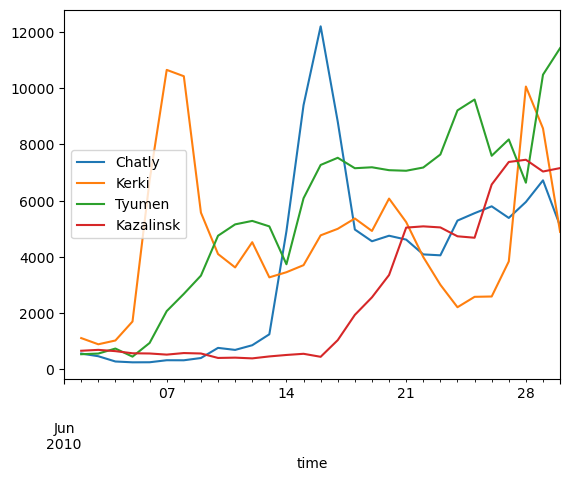

In [32]:
Stations_timeseries_experiment.plot(label = Stations_timeseries_experiment.columns)


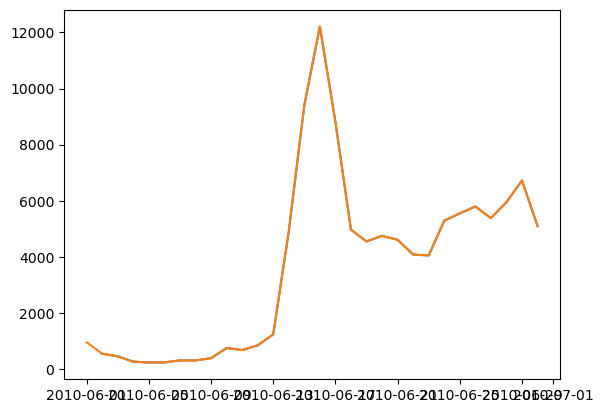

In [33]:
plt.plot(Stations_timeseries_experiment["Chatly"])
plt.plot(Stations_timeseries["Chatly"])

<Axes: xlabel='time'>

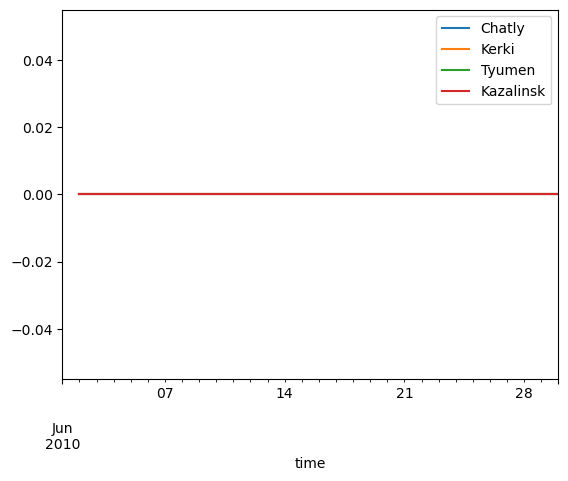

In [34]:
result = Stations_timeseries_experiment - Stations_timeseries
result.plot()

## channel_storage 2
- set_value_at_coords instead of set_value

In [35]:
experiment_coord = ewatercycle.models.PCRGlobWB(
    parameter_set=parameter_set,
    forcing = forcing
)

print(experiment_coord)

PCRGlobWB(
    parameter_set=ParameterSet(
        name='custom_parameter_set',
        directory=PosixPath('/data/shared/parameter-sets/pcrglobwb_global'),
        config=PosixPath('/home/avandervee3/MSc_AralSea/book/thesis_projects/MSc/2025_Q1_AndreVanDerVeen_CEG/work_i
n_progress/Test_Aral/pcrglobwb_aral_basin_ERA5_05min.ini'),
        doi='N/A',
        target_model='pcrglobwb',
        supported_model_versions={'setters'},
        downloader=None
    ),
    forcing=PCRGlobWBForcing(
        start_time='2010-09-01T00:00:00Z',
        end_time='2010-12-31T00:00:00Z',
        directory=PosixPath('/home/avandervee3/MSc_AralSea/book/thesis_projects/MSc/2025_Q1_AndreVanDerVeen_CEG/wor
k_in_progress/Test_Aral/forcing_1010/AralSeaBasin/pcrglobwb/work/diagnostic/script'),
        shape=PosixPath('/home/avandervee3/MSc_AralSea/book/thesis_projects/MSc/2025_Q1_AndreVanDerVeen_CEG/work_in
_progress/Test_Aral/forcing_1010/AralSeaBasin/pcrglobwb/work/diagnostic/script/AralSeaBasin.shp'),
        filenames={},
        precipitationNC='pcrglobwb_OBS6_ERA5_reanaly_1_day_pr_2010-2010_AralSeaBasin.nc',
        temperatureNC='pcrglobwb_OBS6_ERA5_reanaly_1_day_tas_2010-2010_AralSeaBasin.nc'
    )
)

In [36]:
#Creates new folder, only contains .ini file

experiment_coord_config, experiment_coord_dir = experiment_coord.setup(
    start_time = experiment_start_date,
    end_time = experiment_end_date,
    max_spinups_in_years=0
)



In [37]:
print(experiment_coord.parameters)

experiment_coord_para = experiment_coord.parameters

# Convert ISO 8601 strings to datetime objects
start_time = datetime.strptime(experiment_start_date, '%Y-%m-%dT%H:%M:%SZ')
end_time = datetime.strptime(experiment_end_date, '%Y-%m-%dT%H:%M:%SZ')

# Calculate the number of days for the progression bar
delta = end_time - start_time
number_of_days = delta.days
print(f"Number of days to model: {number_of_days}")

dict_items([('start_time', '2010-06-01T00:00:00Z'), ('end_time', '2010-06-30T00:00:00Z'), ('routing_method', 
'accuTravelTime'), ('max_spinups_in_years', '0')])

Number of days to model: 29

In [38]:
experiment_coord.initialize(experiment_coord_config)

In [39]:
import numpy as np

In [40]:
# # Progress bar, since this can take a while
# g = IntProgress(min=0, max=number_of_days) # instantiate the bar
# display(g) # display the bar
# values_pre_before = []
# values_pre_after = []
# values_post_before = []
# values_post_after = []

# # Advance model once before starting overwrite logic
# experiment_coord.update()

# while experiment_coord.time < experiment_coord.end_time:






#     # --- advance the model ---
#     experiment_coord.update()



#     # --- overwrite again ---
#     # custom_water_demand = experiment.get_value_as_xarray("channel_storage",)
#     # custom_water_demand = custom_water_demand*0.98
#     # experiment.set_value("channel_storage", custom_water_demand.values.flatten())

#     temp_value_amu = experiment_coord.get_value_at_coords(
#         "channel_storage", lat=[extraction_amu_lat], lon=[extraction_amu_lon]
#     )[0]
#     temp_value_syr = experiment_coord.get_value_at_coords(
#         "channel_storage", lat=[extraction_syr_lat], lon=[extraction_syr_lon]
#     )[0]
    
#     experiment_coord.set_value_at_coords(
#         "channel_storage",
#         [extraction_amu_lat],
#         [extraction_amu_lon],
#         np.array([temp_value_amu])
#     )

#     experiment_coord.set_value_at_coords(
#         "channel_storage",
#         [extraction_syr_lat],
#         [extraction_syr_lon],
#         np.array([temp_value_syr])
#     )
    





#     # --- track discharges ---
#     time = experiment_coord.time_as_isostr
#     Stations_timeseries_coordinate.loc[time, "Chatly"] = experiment_coord.get_value_at_coords(
#         "discharge", lat=[Chatly_station_latitude], lon=[Chatly_station_longitude]
#     )[0]

#     Stations_timeseries_coordinate.loc[time, "Kerki"] = experiment_coord.get_value_at_coords(
#         "discharge", lat=[Kerki_station_latitude], lon=[Kerki_station_longitude]
#     )[0]

#     Stations_timeseries_coordinate.loc[time, "Tyumen"] = experiment_coord.get_value_at_coords(
#         "discharge", lat=[Tyumen_station_latitude], lon=[Tyumen_station_longitude]
#     )[0]

#     Stations_timeseries_coordinate.loc[time, "Kazalinsk"] = experiment_coord.get_value_at_coords(
#         "discharge", lat=[Kazalinsk_station_latitude], lon=[Kazalinsk_station_longitude]
#     )[0]

#     g.value += 1
# print("Model run finished!")

In [41]:
# # Progress bar, since this can take a while
# g = IntProgress(min=0, max=number_of_days) # instantiate the bar
# display(g) # display the bar
# values_pre_before = []
# values_pre_after = []
# values_post_before = []
# values_post_after = []

# # Advance model once before starting overwrite logic
# experiment_coord.update()

# while experiment_coord.time < experiment_coord.end_time:






#     # --- advance the model ---
#     experiment_coord.update()



#     # --- overwrite again ---
#     # custom_water_demand = experiment.get_value_as_xarray("channel_storage",)
#     # custom_water_demand = custom_water_demand*0.98
#     # experiment.set_value("channel_storage", custom_water_demand.values.flatten())

#     temp_value_amu = experiment_coord.get_value_at_coords(
#         "channel_storage", lat=[extraction_amu_lat], lon=[extraction_amu_lon]
#     )[0]
#     temp_value_syr = experiment_coord.get_value_at_coords(
#         "channel_storage", lat=[extraction_syr_lat], lon=[extraction_syr_lon]
#     )[0]
    
#     experiment_coord.set_value_at_coords(
#         "channel_storage",
#         [extraction_amu_lat],
#         [extraction_amu_lon],
#         np.array([temp_value_amu])
#     )

#     experiment_coord.set_value_at_coords(
#         "channel_storage",
#         [extraction_syr_lat],
#         [extraction_syr_lon],
#         np.array([temp_value_syr])
#     )
    





#     # --- track discharges ---
#     time = experiment_coord.time_as_isostr
#     Stations_timeseries_coordinate.loc[time, "Chatly"] = experiment_coord.get_value_at_coords(
#         "discharge", lat=[Chatly_station_latitude], lon=[Chatly_station_longitude]
#     )[0]

#     Stations_timeseries_coordinate.loc[time, "Kerki"] = experiment_coord.get_value_at_coords(
#         "discharge", lat=[Kerki_station_latitude], lon=[Kerki_station_longitude]
#     )[0]

#     Stations_timeseries_coordinate.loc[time, "Tyumen"] = experiment_coord.get_value_at_coords(
#         "discharge", lat=[Tyumen_station_latitude], lon=[Tyumen_station_longitude]
#     )[0]

#     Stations_timeseries_coordinate.loc[time, "Kazalinsk"] = experiment_coord.get_value_at_coords(
#         "discharge", lat=[Kazalinsk_station_latitude], lon=[Kazalinsk_station_longitude]
#     )[0]

#     g.value += 1
# print("Model run finished!")

In [42]:
# Progress bar, since this can take a while
g = IntProgress(min=0, max=number_of_days) # instantiate the bar
display(g) # display the bar
values_pre_before = []
values_pre_after = []
values_post_before = []
values_post_after = []

# Advance model once before starting overwrite logic
experiment_coord.update()

while experiment_coord.time < experiment_coord.end_time:






    # --- advance the model ---
    experiment_coord.update()



    # --- overwrite again ---

    arr = experiment_coord.get_value_as_xarray("channel_storage")
    # # find nearest indices
    # lat_idx = (np.abs(arr.lat - extraction_amu_lat)).argmin()
    # on_idx = (np.abs(arr.lon - extraction_amu_lon)).argmin()
    # arr.values[lat_idx, lon_idx] *= 0.9

    # lat_idx = (np.abs(arr.lat - extraction_syr_lat)).argmin()
    # lon_idx = (np.abs(arr.lon - extraction_syr_lon)).argmin()
    # arr.values[lat_idx, lon_idx] *= 0.9

    arr = arr*0.98

    experiment_coord.set_value("channel_storage", arr.values.flatten())




    # # custom_water_demand = experiment.get_value_as_xarray("channel_storage",)
    # # custom_water_demand = custom_water_demand*0.98
    # # experiment.set_value("channel_storage", custom_water_demand.values.flatten())

    # temp_value_amu = experiment_coord.get_value_at_coords(
    #     "channel_storage", lat=[extraction_amu_lat], lon=[extraction_amu_lon]
    # )[0]
    # temp_value_syr = experiment_coord.get_value_at_coords(
    #     "channel_storage", lat=[extraction_syr_lat], lon=[extraction_syr_lon]
    # )[0]
    
    # experiment_coord.set_value_at_coords(
    #     "channel_storage",
    #     [extraction_amu_lat],
    #     [extraction_amu_lon],
    #     np.array([temp_value_amu])
    # )

    # experiment_coord.set_value_at_coords(
    #     "channel_storage",
    #     [extraction_syr_lat],
    #     [extraction_syr_lon],
    #     np.array([temp_value_syr])
    # )
    





    # --- track discharges ---
    time = experiment_coord.time_as_isostr
    Stations_timeseries_coordinate.loc[time, "Chatly"] = experiment_coord.get_value_at_coords(
        "discharge", lat=[Chatly_station_latitude], lon=[Chatly_station_longitude]
    )[0]

    Stations_timeseries_coordinate.loc[time, "Kerki"] = experiment_coord.get_value_at_coords(
        "discharge", lat=[Kerki_station_latitude], lon=[Kerki_station_longitude]
    )[0]

    Stations_timeseries_coordinate.loc[time, "Tyumen"] = experiment_coord.get_value_at_coords(
        "discharge", lat=[Tyumen_station_latitude], lon=[Tyumen_station_longitude]
    )[0]

    Stations_timeseries_coordinate.loc[time, "Kazalinsk"] = experiment_coord.get_value_at_coords(
        "discharge", lat=[Kazalinsk_station_latitude], lon=[Kazalinsk_station_longitude]
    )[0]

    g.value += 1
print("Model run finished!")

IntProgress(value=0, max=29)

Model run finished!

<Axes: xlabel='time'>

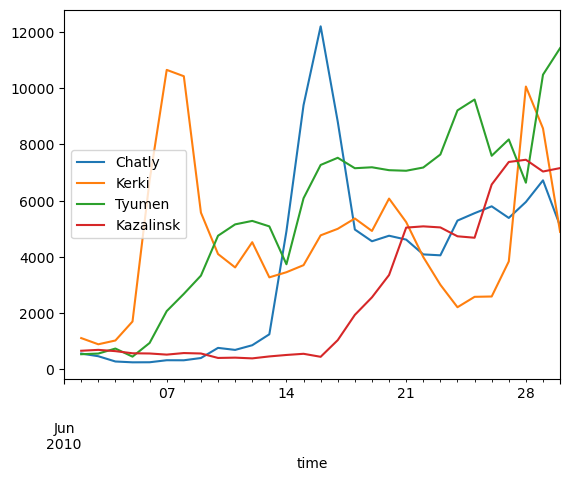

In [43]:
Stations_timeseries_coordinate.plot(label = Stations_timeseries_coordinate.columns)


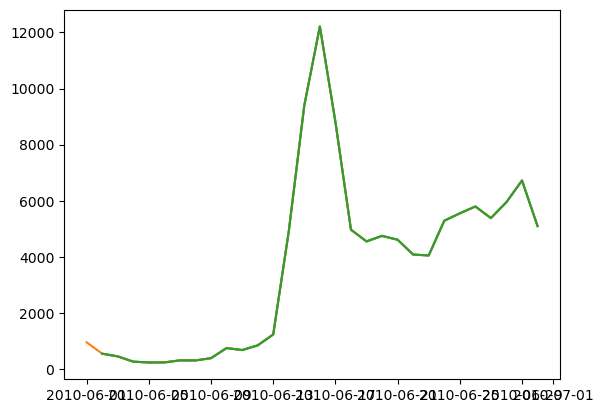

In [44]:
plt.plot(Stations_timeseries_experiment["Chatly"])
plt.plot(Stations_timeseries["Chatly"])
plt.plot(Stations_timeseries_coordinate["Chatly"])

<Axes: xlabel='time'>

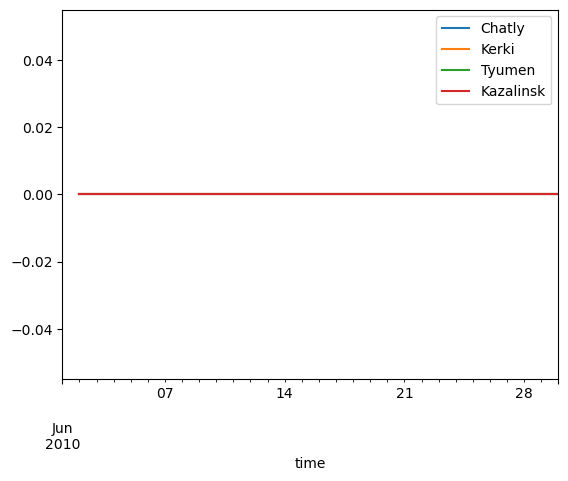

In [45]:
result = Stations_timeseries_coordinate - Stations_timeseries
result.plot()

In [46]:
help(experiment_coord.set_value_at_coords)

Help on method set_value_at_coords in module ewatercycle.base.model:

set_value_at_coords(name: str, lat: collections.abc.Iterable[float], lon: collections.abc.Iterable[float], values: numpy.ndarray) -> None method of ewatercycle_pcrglobwb.model.PCRGlobWB instance
    Specify a new value for a model variable at at lat/lon coordinates.

    Args:
        name: Name of variable
        lat: Latitudinal value
        lon: Longitudinal value
        values: The new value for the specified variable.



In [47]:
help(experiment_coord.set_value)

Help on method set_value in module ewatercycle.base.model:

set_value(name: str, value: numpy.ndarray) -> None method of ewatercycle_pcrglobwb.model.PCRGlobWB instance
    Specify a new value for a model variable.

    Args:
        name: Name of variable
        value: The new value for the specified variable.

